# AlexNet & VGGNet 비교




In [1]:
# Seed
import torch
import numpy as np
import random

torch.manual_seed(0)
torch.cuda.manual_seed(0)
np.random.seed(0)
random.seed(0)

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## AlexNet
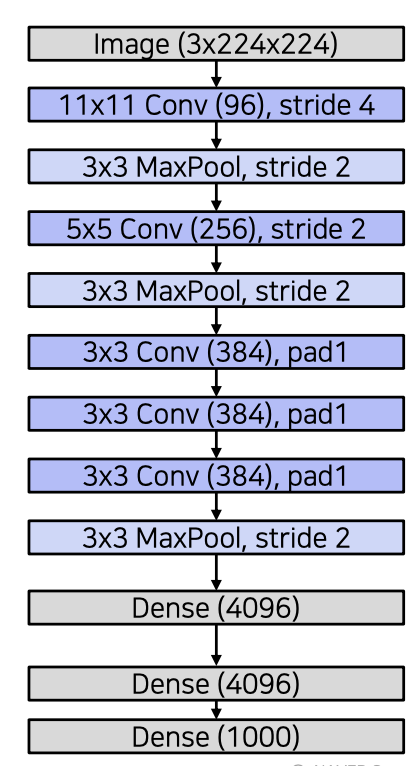

In [2]:
import torch
import torch.nn as nn

# AlexNet Implementation
class AlexNet(nn.Module):
  def __init__(self, num_classes=1000):
    super(AlexNet, self).__init__()

    self.relu = nn.ReLU(inplace=True)
    
    # Convolution Feature Extraction Part
    self.conv1 = nn.Conv2d(3, 96, kernel_size=11, stride=4, padding=2)
    self.pool1 = nn.MaxPool2d(kernel_size=3, stride=2)

    self.conv2 = nn.Conv2d(96, 256, kernel_size=5, padding=2)
    self.pool2 = nn.MaxPool2d(kernel_size=3, stride=2)

    self.conv3 = nn.Conv2d(256, 384, kernel_size=3, padding=1)

    self.conv4 = nn.Conv2d(384, 384, kernel_size=3, padding=1)

    self.conv5 = nn.Conv2d(384, 256, kernel_size=3, padding=1)
    
    self.pool3 = nn.MaxPool2d(kernel_size=3, stride=2)

    
    # Avg Pooling
    self.avgpool = nn.AdaptiveAvgPool2d((6, 6))

    # Dense Layers
    self.drop1 = nn.Dropout()
    self.lin1 = nn.Linear(256*6*6, 4096)

    self.drop2 = nn.Dropout()
    self.lin2 = nn.Linear(4096, 4096)

    self.lin3 = nn.Linear(4096, num_classes)

  def forward(self, x):
    # Convolution Feature Extraction Part
    x = self.conv1(x)
    x = self.relu(x)
    x = self.pool1(x)
    
    x = self.conv2(x)
    x = self.relu(x)
    x = self.pool2(x)
    
    x = self.conv3(x)
    x = self.relu(x)
    x = self.conv4(x)
    x = self.relu(x)
    x = self.conv5(x)
    x = self.relu(x)
    x = self.pool3(x)

    # Avg Pool & Flatten
    x = self.avgpool(x)
    x = torch.flatten(x, 1)
    
    # Dense Layer Part
    x = self.drop1(x)
    x = self.lin1(x)
    x = self.relu(x)

    x = self.drop2(x)
    x = self.lin2(x)
    x = self.relu(x)
    
    x = self.lin3(x)
    return x

## VGGNet
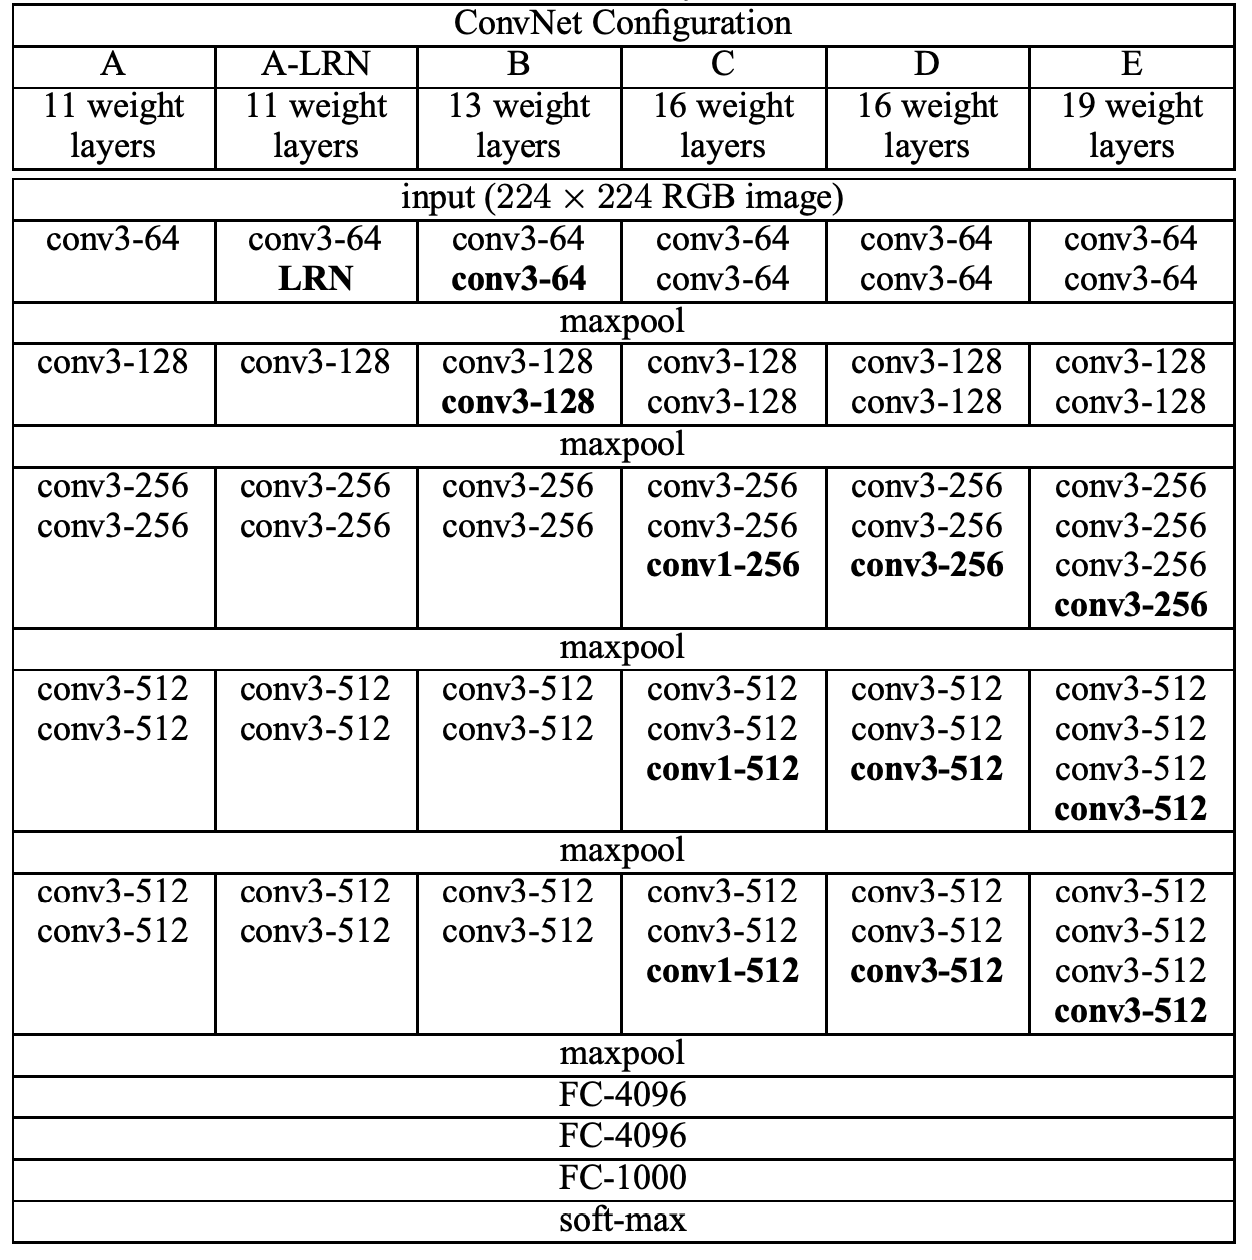

In [3]:
# VGGNet
class VGG11(nn.Module):
  def __init__(self, num_classes=1000):
    super(VGG11, self).__init__()

    self.relu = nn.ReLU(inplace=True)
    
    # Convolution Feature Extraction Part
    self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
    self.bn1   = nn.BatchNorm2d(64)
    self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

    '''==========================================================='''
    '''======================== TO DO (1) ========================'''
    self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
    self.bn2   = nn.BatchNorm2d(128)
    self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

    self.conv3_1 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
    self.bn3_1   = nn.BatchNorm2d(256)
    self.conv3_2 = nn.Conv2d(256, 256, kernel_size=3, padding=1)
    self.bn3_2   = nn.BatchNorm2d(256)
    self.pool3   = nn.MaxPool2d(kernel_size=2, stride=2)

    self.conv4_1 = nn.Conv2d(256, 512, kernel_size=3, padding=1)
    self.bn4_1   = nn.BatchNorm2d(512)
    self.conv4_2 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
    self.bn4_2   = nn.BatchNorm2d(512)
    self.pool4   = nn.MaxPool2d(kernel_size=2, stride=2)

    self.conv5_1 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
    self.bn5_1   = nn.BatchNorm2d(512)
    self.conv5_2 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
    self.bn5_2   = nn.BatchNorm2d(512)
    self.pool5   = nn.MaxPool2d(kernel_size=2, stride=2)
    

    # Fully Connected Classifier Part
    self.fc1      = nn.Linear(512 * 7 * 7, 4096)
    self.dropout1 = nn.Dropout()
    
    self.fc2      = nn.Linear(4096, 4096)
    self.dropout2 = nn.Dropout()
    
    self.fc3      = nn.Linear(4096, num_classes)
    

  def forward(self, x):
    # Convolution Feature Extraction Part
    x = self.conv1(x)
    x = self.bn1(x)
    x = self.relu(x)
    x = self.pool1(x)
    
    x = self.conv2(x)
    x = self.bn2(x)
    x = self.relu(x)
    x = self.pool2(x)
    

    x = self.conv3_1(x)
    x = self.bn3_1(x)
    x = self.relu(x)
    x = self.conv3_2(x)
    x = self.bn3_2(x)
    x = self.relu(x)
    x = self.pool3(x)
    
    x = self.conv4_1(x)
    x = self.bn4_1(x)
    x = self.relu(x)
    x = self.conv4_2(x)
    x = self.bn4_2(x)
    x = self.relu(x)
    x = self.pool4(x)

    
    x = self.conv5_1(x)
    x = self.bn5_1(x)
    x = self.relu(x)
    x = self.conv5_2(x)
    x = self.bn5_2(x)
    x = self.relu(x)
    x = self.pool5(x)
    
    # Fully Connected Classifier Part
    x = torch.flatten(x, 1)
    x = self.fc1(x)
    x = self.relu(x)
    x = self.dropout1(x)
    
    x = self.fc2(x)
    x = self.relu(x)
    x = self.dropout2(x)
    
    x = self.fc3(x)
    
    return x

In [4]:
# Network
vgg_model = VGG11(num_classes=1000)

# Random input
x = torch.randn((1, 3, 224, 224))

# Forward
out = vgg_model(x)

# Check the output shape
print("Output tensor shape is :", out.shape)

Output tensor shape is : torch.Size([1, 1000])


In [5]:
alex_model = AlexNet(num_classes=1000)

# Random input
x = torch.randn((1, 3, 224, 224))

# Forward
out = alex_model(x)

# Check the output shape
print("Output tensor shape is :", out.shape)

Output tensor shape is : torch.Size([1, 1000])


## CIFAR10 성능 비교
* AlexNet과 VGGNet의 성능을 비교하기 위해 CIFAR10 데이터셋을 학습

In [6]:
import torchvision
from torchvision.datasets import CIFAR10
from torchvision import transforms
from torch.optim import Adam

# Transform into 3-channel 224*224 image
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((224,224)),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                          std=[0.229, 0.224, 0.225])
])


batch_size = 4
# Get Dataset
train_data = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=2)

test_data = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False, num_workers=2)

classes = ('Airplane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck')

# Model
alex_model = AlexNet(num_classes=10)
vgg_model = VGG11(num_classes=10)

# Loss & Optimizer
lr = 1e-4
input_size = 224

alex_loss = nn.CrossEntropyLoss()
vgg_loss = nn.CrossEntropyLoss()

alex_optm = Adam(alex_model.parameters(), lr=lr)
vgg_optm = Adam(vgg_model.parameters(), lr=lr)


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [7]:
# AlexNet
# Code Reference: https://www.kaggle.com/drvaibhavkumar/alexnet-in-pytorch-cifar10-clas-83-test-accuracy
import time


alex_model.cuda()
vgg_model.cuda()
alex_model.train()
vgg_model.train()
for epoch in range(10):  # loop over the dataset multiple times
    alex_running_loss = 0.0
    vgg_running_loss = 0.0
    start_time = time.time()
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].cuda(), data[1].cuda()

        # zero the parameter gradients
        alex_optm.zero_grad()
        vgg_optm.zero_grad()

        # forward + backward + optimize
        alex_output = alex_model(inputs)
        alex_loss_func = alex_loss(alex_output, labels)
        alex_loss_func.backward()
        alex_optm.step()

        vgg_output = vgg_model(inputs)
        vgg_loss_func = vgg_loss(vgg_output, labels)
        vgg_loss_func.backward()
        vgg_optm.step()

        # Time
        end_time = time.time()
        time_taken = end_time - start_time

        # print statistics
        alex_running_loss += alex_loss_func.item()
        vgg_running_loss += vgg_loss_func.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] AlexNet loss: %.3f' % (epoch + 1, i + 1, alex_running_loss / 2000))
            alex_running_loss = 0.0
            print('[%d, %5d] VGGNet loss: %.3f' % (epoch + 1, i + 1, vgg_running_loss / 2000))
            vgg_running_loss = 0.0
            print('Time:',time_taken)

    total = 0
    alex_correct = 0
    vgg_correct = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data[0].cuda(), data[1].cuda()
            alex_outputs = alex_model(images)
            _, alex_predicted = torch.max(alex_outputs.data, 1)
            vgg_outputs = vgg_model(images)
            _, vgg_predicted = torch.max(vgg_outputs.data, 1)
            total += labels.size(0)
            alex_correct += (alex_predicted == labels).sum().item()
            vgg_correct += (vgg_predicted == labels).sum().item()
    print('Accuracy of AlexNet on the 10000 test images: %.2f %%' % (100 * alex_correct / total))
    print('Accuracy of VGGNet on the 10000 test images: %.2f %%' % (100 * vgg_correct / total))
    

print('Finished Training of AlexNet')

[1,  2000] AlexNet loss: 1.979
[1,  2000] VGGNet loss: 2.132
Time: 258.3801374435425
[1,  4000] AlexNet loss: 1.593
[1,  4000] VGGNet loss: 1.902
Time: 516.9047455787659
[1,  6000] AlexNet loss: 1.423
[1,  6000] VGGNet loss: 1.797
Time: 775.1589343547821
[1,  8000] AlexNet loss: 1.303
[1,  8000] VGGNet loss: 1.697
Time: 1033.5213968753815
[1, 10000] AlexNet loss: 1.228
[1, 10000] VGGNet loss: 1.629
Time: 1291.8867852687836
[1, 12000] AlexNet loss: 1.135
[1, 12000] VGGNet loss: 1.543
Time: 1550.1864194869995
Accuracy of AlexNet on the 10000 test images: 60.30 %
Accuracy of VGGNet on the 10000 test images: 44.30 %
[2,  2000] AlexNet loss: 1.033
[2,  2000] VGGNet loss: 1.453
Time: 258.3724205493927
[2,  4000] AlexNet loss: 1.012
[2,  4000] VGGNet loss: 1.378
Time: 516.7670702934265
[2,  6000] AlexNet loss: 0.979
[2,  6000] VGGNet loss: 1.305
Time: 775.1725783348083
[2,  8000] AlexNet loss: 0.944
[2,  8000] VGGNet loss: 1.223
Time: 1033.5326302051544
[2, 10000] AlexNet loss: 0.956
[2, 1000